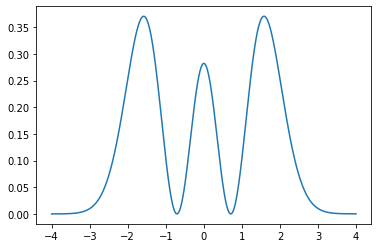

In [61]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import scipy as sp


hbar = m = m_e = a_0 = e = k = 1.0
omega = np.sqrt(k / m)

N=10000
infty = 4
L = 1
V0 = 10

xi_infty, xf_infty = 0, infty
xi_infty_centered, xf_infty_centered = -infty/2, infty/2

xi_L, xf_L = 0, L
xi_L_centered, xf_L_centered = -L/2, L/2

from numpy import sinh, cosh, tanh

def V_qho(x):
    return 0.5*m*omega**2*x**2

def V_qho_inv(y):
    return np.sqrt(y/(0.5*m*omega**2))

xi,xf = -infty,infty
x = np.linspace(xi,xf,N)
psi = np.zeros(N)
h = x[1]-x[0]
psi[0], psi[1] = 0,h
E = 2.5
V = V_qho

for i in range(1,N-1):
    psi[i+1] = 2*(m*(h/hbar)**2*(V(xi+i*h)-E)+1)*psi[i]-psi[i-1]
    psi = psi/np.sqrt(np.trapz(psi**2,x=x))
    

plt.plot(x,psi**2)
plt.show()



|Potential                  |Domain                                       |Equation                                     |
|:--------------------------|:-----------------------|:--------------------------------------------|
|Quantum Harmonic Oscillator|$$x\in(-\infty,\infty)$$|$$\frac{1}{2}m\omega^2x^2$$             |
|Infinite Square Well       |$$x\in(-L/2,L/2)$$      |$$\left\{\begin{array}{cc}                                                                                                       0,&-\frac{L}{2}\geq x\leq\frac{L}{2}\\                                                                                          \text{inf},&\text{else}\end{array}\right.$$|
|Finite Square Well         |$$x\in(-\infty,\infty)$$|$$\left\{\begin{array}{cc}                                                                                                       0,&-\frac{L}{2}\geq x\leq\frac{L}{2}\\                                                                                          V_0,&\text{else}\end{array}\right.$$       |
|Step Potential             |$$x\in(-\infty,\infty)$$|$$\left\{\begin{array}{cc}
                                                        0,&x\leq0\\
                                                        V_0,&\text{else}\end{array}\right.$$       |
|Delta Potential            |$$x\in(-\infty,\infty)$$|$$\left\{\begin{array}{cc}
                                                        \infty,&x=0\\
                                                        0,&\text{else}\end{array}\right.$$         |
|Double Delta Potential     |$$x\in(-\infty,\infty)$$|$$\left\{\begin{array}{cc}
                                                        \infty,&x=-\frac{L}{2}\\
                                                        \infty,&x=\frac{L}{2}\\
                                                        0,&\text{else}\end{array}\right.$$         |
|Triangle Well Potential    |$$x\in(-\infty,\infty)$$|$$\left\{\begin{array}{cc}
                                                        \frac{-2V_0x}{x_f-x_i},&x<0\\
                                                        \frac{2V_0x}{x_f-x_i},&\text{else}
                                                        \end{array}\right.$$                       |
|Morse Potential            |$$x\in(0,\infty)$$      |$$D_e(e^{-2a(x-r_e)}-2e^{-a(x-r_e)})$$       |
|Lennard-Jones              |$$x\in(0,\infty)$$      |$$\epsilon((r_m/x)^{12}-2(r_m/x)^6)$$        |
|Inverse Square-Root        |$$x\in(-\infty,\infty)$$|$$\frac{V_0}{\sqrt{|x|}}$$                   |
|Quantum Pendulum           |$$x\in(-\infty,\infty)$$|$$mgl(1-\cos(x))$$                           |
|                           |Remember:               |$$T=-\frac{\hbar^2}{2ml^2}*\nabla^2$$        |
|Rectangular Barrier        |$$x\in(0,L)$$           |$$\left\{\begin{array}{cc}
                                                        V_0,&x=\frac{L}{3}\geq x\geq\frac{2L}{3}\\
                                                        0,&\text{else}\end{array}\right.$$         |
|Poschl-Teller Potential    |$$x\in(-\infty,\infty)$$|$$-\frac{1}{2}\left(\lambda(\lambda+1)\cosh^{-2}(x)+\nu(\nu+1)\sinh^{-2}(x)\right)$$ |
|Rosen-Morse Potential      |$$x\in(-\infty,\infty)$$|$$-\frac{1}{2}\lambda(\lambda+1)\cosh(x)^{-2}-g\tanh(x)$$|
|Eckhart Potential          |$$x\in(-\infty,\infty)$$|$$V_0\cosh^{-2}\left(\frac{x}{a}\right)$$    |
|Hydrogen Atom              |$$x\in(0,\infty)$$      |$$\frac{l(l+1)}{r^2}-\frac{e^2}{4\pi\epsilon_0r}$$|
|                           |                        |$$V(r) = \frac{l(l+1)}{r^2}-\frac{1}{r}$$    |